In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

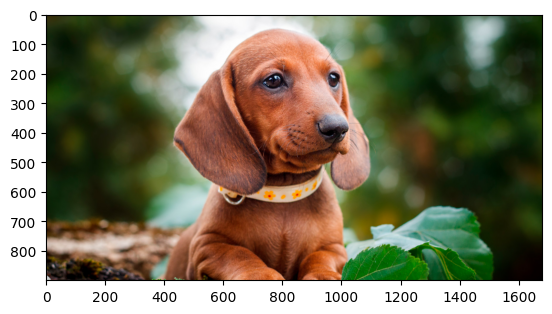

In [2]:
# Cargar la imagen proporcionada por el usuario
file_path = './images/salchicha.jpg'
original_image = Image.open(file_path)

# msotramos la imagen
plt.imshow(original_image)

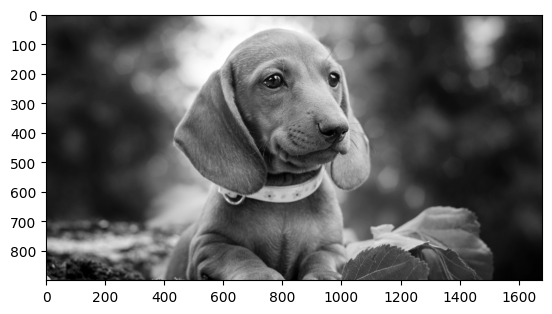

In [3]:
# Convertir la imagen a escala de grises
gray_image = original_image.convert("L")

# mostramos la imagen
plt.imshow(gray_image, cmap='gray')

In [4]:
# Convertir la imagen en escala de grises a una matriz
image_matrix = np.array(gray_image)

# mostramos la matriz
image_matrix

array([[ 44,  44,  44, ...,  35,  33,  32],
       [ 44,  44,  44, ...,  35,  33,  32],
       [ 44,  44,  44, ...,  34,  33,  32],
       ...,
       [209, 208, 207, ...,   1,   1,   1],
       [208, 207, 205, ...,   1,   1,   1],
       [204, 203, 201, ...,   1,   1,   1]], dtype=uint8)

In [5]:
# Aplicar SVD a la matriz de la imagen
U, S, VT = svd(image_matrix)

# mostramos los calores de U, S y VT
print("U:", U.shape)
print("S:", S.shape)
print("VT:", VT.shape)
# Mostrar los primeros 5 valores singulares para dar una idea de su magnitud
print("Primeros 5 valores singulares:", S[:5])

U: (900, 900)
S: (900,)
VT: (1680, 1680)
Primeros 5 valores singulares: [120464.1    31856.236  18717.31   14557.891  13749.157]


In [6]:
# Vamos a reconstruir la imagen usando diferentes números de valores singulares
# para observar el efecto de la compresión
components = [2, 5, 15, 30, 50]  # Número de componentes singulares a usar para la reconstrucción

# Función para reconstruir la imagen con un número específico de componentes
def reconstruct_image(U, S, VT, k):
    # Tomar las primeras 'k' componentes
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    VTk = VT[:k, :]

    # Reconstruir la imagen
    return np.dot(Uk, np.dot(Sk, VTk))



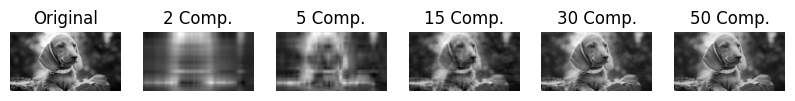

In [7]:
# Reconstruir y mostrar las imágenes comprimidas
plt.figure(figsize=(10, 6))
plt.subplot(1, len(components) + 1, 1)
plt.imshow(image_matrix, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, k in enumerate(components):
    compressed_image = reconstruct_image(U, S, VT, k)
    plt.subplot(1, len(components) + 1, i+2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f"{k} Comp.")
    plt.axis('off')

plt.show()


In [ ]:
#ahora hacemos el mismo proceso pero para imagenes a color
# Cargar la imagen proporcionada por el usuario
